In [24]:
import json
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from datetime import datetime
import humanize

In [14]:
f = open('mem_out_1596381253.txt', 'r').read().splitlines()

In [18]:
# maps pid -> details
processes = {}

for line in f:
    line = json.loads(line)
    for p in line:
        if p['name'] == 'ray::IDLE' or p['name'] == 'raylet': continue
        if not p['name'].startswith('ray'): continue
        p['timestep'] = datetime.fromtimestamp(p['timestep'])
        p['total_mem'] = p['mem_info']['rss']#np.sum(list(p['mem_info'].values()))
        if p['id'] not in processes:
            processes[p['id']] = []
        processes[p['id']].append(p)

In [19]:
names = {pid: p[-1]['name'] for pid, p in processes.items()}

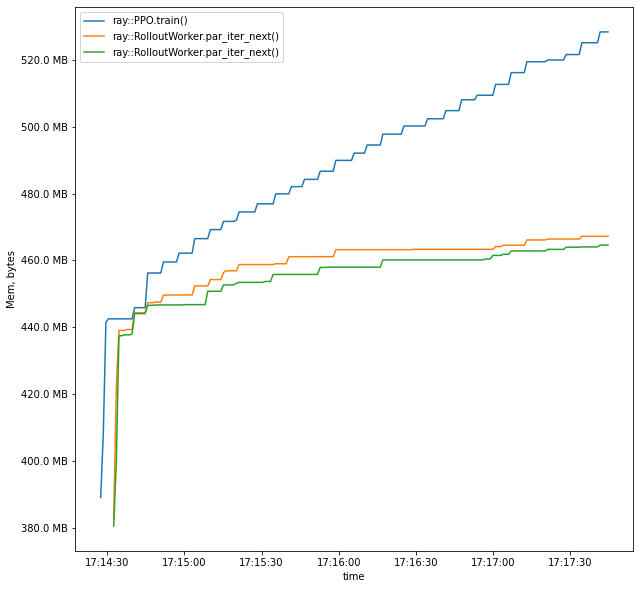

In [27]:
plt.figure(figsize=(10, 10))
for pid, p in processes.items():
    plt.plot([x['timestep'] for x in processes[pid]],
        [x['mem_info']['rss'] for x in processes[pid]], label=names[pid])
plt.legend()
plt.xlabel('time')
plt.ylabel('Mem, bytes')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: humanize.naturalsize(x)))
plt.show()